<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2  

C:\Users\skagm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 3 0 0 1 1 0 1 1 1 1 1 1 0 1
 0 0 1 1 1 0 0 0 0 0 2 0 0 1 1 0 0 1 1 2 0 1 1 0 2 0 0 1 2 1 0 1 1 1 3 1 0
 0 1 1 0 1 1 1 0 0 1 0 2 2 3 1 1 1 1 2 3 0 1 0 1 1 1 0 0 0 3 1 1 0 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 3 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 3 1 3 1
 1 1 1 0 0 1 1 1 0 1 1 4 0 4 4 0 0 4 4 4 0 4 4 4 0 4 2 4 4 0 4 0 4 0 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 2 4 4 4 4 4 4 4
 4 4 4 4 4 0 4 0 4 0 4 4 4 4 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 4 0
 4 0 0 4 0 0 0 0 0 0 0 4 4 0 4 4 0 4 4 0 4 4 4 0 4 4 4 4 4 3 4 4 4 4 4 0 4
 2 4 0 4 4 4 4 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


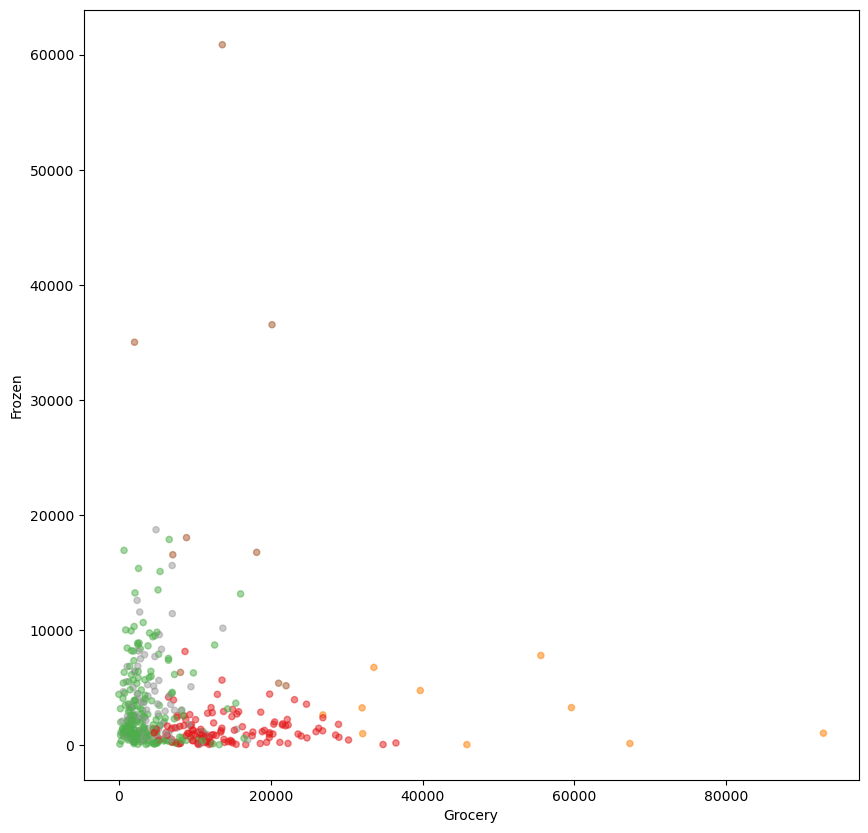

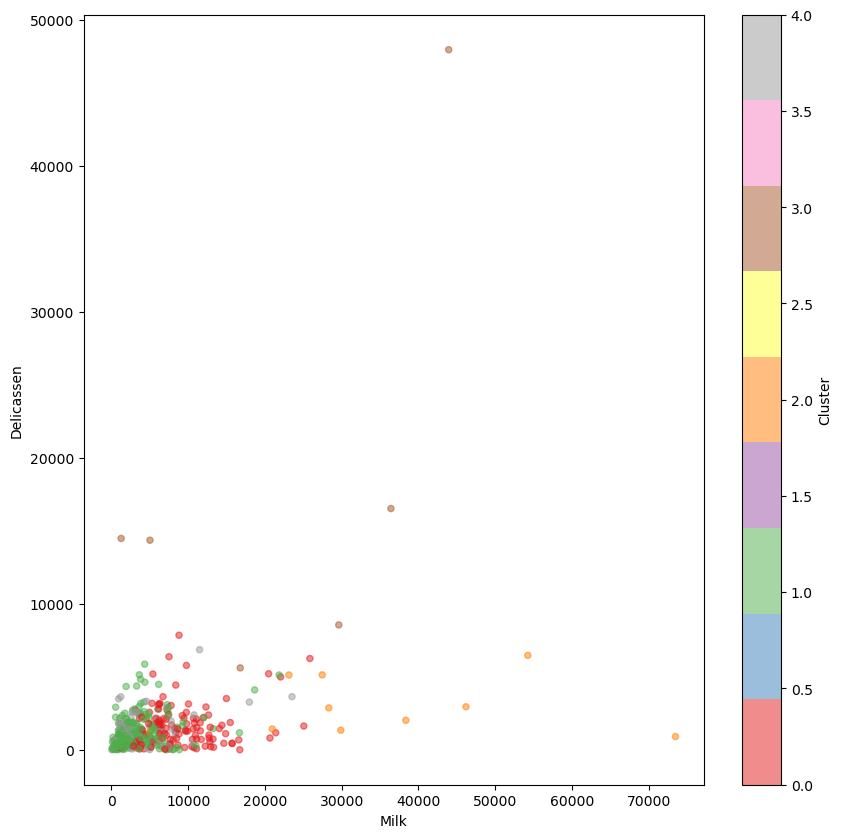

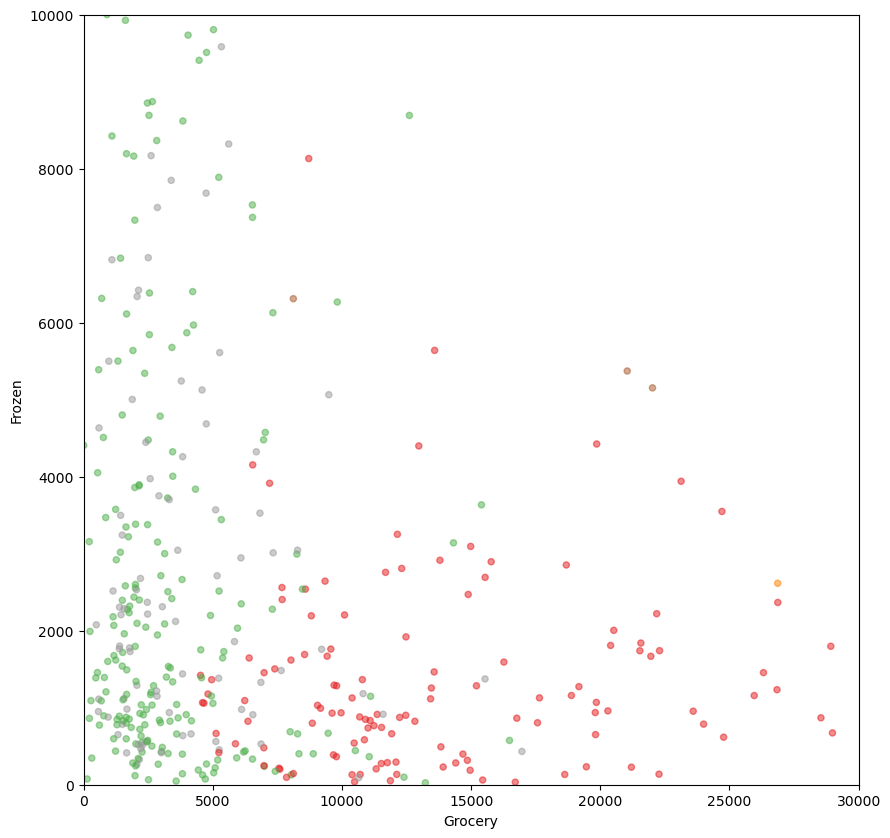

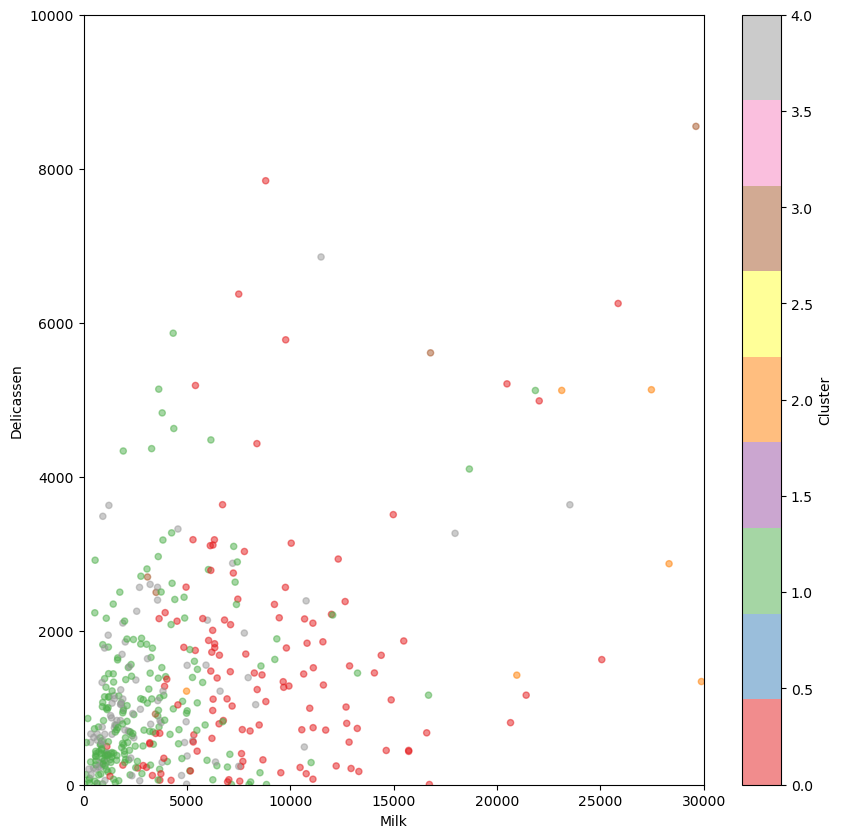

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)

df.head()

df.info()

df.describe()

df.isnull().sum()

df.duplicated().sum()

df.isnull().sum()

df.duplicated().sum()

X = df.iloc[:, :]
print(X[:5])

from sklearn import preprocessing
X_std = preprocessing.StandardScaler().fit_transform(X)

X_std[:5]

from sklearn import cluster

kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

kmeans.fit(X_std)   

cluster_label = kmeans.labels_   
print(cluster_label)

df['Cluster'] = cluster_label
df.head()

df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', colorbar=False, alpha=0.5, figsize=(10, 10));
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', colorbar=True, alpha=0.5, figsize=(10, 10));

ax1 = df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', colorbar=False, alpha=0.5, figsize=(10, 10))
ax2 = df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', colorbar=True, alpha=0.5, figsize=(10, 10))
ax1.set_xlim(0, 30000)
ax1.set_ylim(0, 10000)
ax2.set_xlim(0, 30000)
ax2.set_ylim(0, 10000)
plt.show()